In [1]:
from aixi_booster import *
import numpy as np
import pandas as pd

In [2]:
#X = np.array(np.arange(1000),ndmin=2).T
#Y = np.array(np.sin(X/12.),ndmin=2)

In [3]:
#делаем датасет
#Суть датасета: есть зашумлённая синусоида, на которую наложены случайные блуждания. 
#AIXI примерно знает текущее состояние блужданий и немного устаревшие значения этой "синусоиды"
j = 0
X_lst = []
Y_lst = []
X_rec = [0, 0]
k = 0
dk = -0.015
for i in range(1000):
    j += (np.random.rand()-0.5)*6
    dk += (np.random.rand()-0.48)*0.001
    k += dk
    Y_rec = [np.sin(X_rec[0]*0.07 + X_rec[1]*0.07) + k]
    Y_prev = 0
    if len(Y_lst)>5:
        Y_prev = Y_lst[-5][0]
    X_rec = [i, j, dk, Y_prev]
    X_lst.append(X_rec)
    Y_lst.append(Y_rec)
X = np.array(X_lst)
Y = np.array(Y_lst)

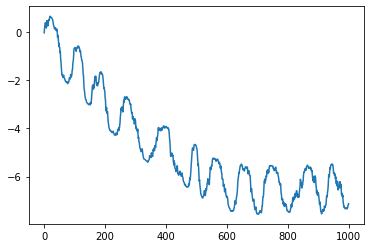

In [4]:
plt.plot(Y)

In [15]:
border = 500
X_train = X[:border,:]
X_test = X[border:,:]
Y_train = Y[:border,:]
Y_test = Y[border:,:]

In [26]:
%%time
#forest_count - число гипотез, то есть размер леса гипотез
#episodes - эпизоды работы AIXI. Если в реальной жизни данные - это несколько блоков по несколько записей.
#Причём каждый блок - это последовательность, у которой известно прошлое, но неизвестно будущее и неизвестны другие последовательности.
#Вот эпизоды - это такие последовательности. Например, если у нас данные - это 2 поездки на машине в 10 минут и в 50 минут, то первым эпизодом будут данные из одной поездки, а вторым - из второй.
#sample_part - сколько последовательностей использовать для генерации каждой одной гипотезы
#popsize, maxiter, alpha_count, elitarism, mutation_p - параметры эволюции (мы не будет тупо перебирать гипотезы)
#popsize - размер популяции, maxiter - число поколений, alpha_count - число альфачей (кто размножается), elitarism - число элитариев (кто сохраняется в неизменном виде в следующем поколении) 
#mutation_p - вероятность мутации
#boosting_count - каждая гипотеза сделана по схеме "бустинг". То есть вначале подбираем гипотезу, 
#которая максимально хорошо предсказывает Y, затем гипотезу, которая максимально хорошо исправляет ошибки первой гипотезы и так далее
#boosting_count - это число слоёв в этом "бутерброде"
model = symbolic_regression_multyboosting(size_genom=900,tact_count=30, regularization=0.06)
episodes=[[0,int(len(Y_train)/3)],[int(len(Y_train)/3),int(2*len(Y_train)/3)],[int(2*len(Y_train)/3),int(len(Y_train))]]
model.fit(X_train,Y_train,forest_count=5,sample_part=0.6,episodes=episodes,popsize=40, maxiter=4, boosting_count=2, alpha_count=6, elitarism=2, mutation_p=0.02)

FOREST NUMBER 0, episodes [[  0 166]
 [166 333]]
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.002 0.005892232524668952 0.004214056354032233 0.009320932989261092
[0.66666667 0.00428725 0.002      0.0039604  0.00649351 0.00736196
 0.002      0.00624442 0.00503145 0.00452489 0.00376884 0.00843882
 0.00571429 0.00576037 0.002      0.00335196 0.0074813  0.002
 0.0040404  0.002      0.00505051 0.0042337  0.00302801 0.00230681
 0.00329218 0.00415512 0.00219298 0.00338983 0.0074813  0.00503145
 0.002      0.0076118  0.00732601 0.002      0.00478469 0.00314795
 0.0060241  0.00218818 0.00208551 0.00679117 0.00772201 0.00299401
 0.004561   0.002      0.00433276 0.00358852 0.0031746  0.00564175
 0.00410397 0.00630631 0.00461095 0.00957592 0.01165501 0.00543478
 0.00529101 0.00773694 0.002      0.00478011 0.00478011 0.00478011
 0.00478011 0.00478011 0.00473037 0.00510204 0.00460829 0.00502513
 0.01006513 0.00830368 0.01121795 0.012      0.01102728 0.00862069
 0.01090188 0.00793651 0.0080429  

selected boosting with linear layer, mse 0.011937406307022657 [0.011937406307022657, 0.012584250187765034, 0.014765722808861147, 0.014234101926339159, 0.014854427265651038, 0.01485713765950071]
BOOST 0 ready. Score 0.02043545957475737.i 0
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.002 0.006261361341163401 0.0045537340620218575 0.009226252883224996
[0.66666667 0.00533618 0.002      0.00355872 0.00641026 0.00734394
 0.002      0.00624442 0.00502513 0.00533808 0.00375    0.0083682
 0.00673401 0.00574713 0.002      0.00330033 0.00827815 0.002
 0.00373483 0.002      0.00501505 0.00423012 0.00302115 0.00341686
 0.00328677 0.00405954 0.00217628 0.00337079 0.00992556 0.00480192
 0.002      0.0075543  0.00661157 0.002      0.00478469 0.0039604
 0.00601892 0.00322234 0.00207469 0.00676819 0.00753296 0.00392157
 0.004561   0.002      0.00426985 0.0045977  0.00315956 0.00767263
 0.00506329 0.00684346 0.00461095 0.01049869 0.01271676 0.00719424
 0.00527983 0.00773694 0.002      0.00470367 0

selected boosting without linear layer, mse 2.7018580368144844 [2.793334788497727, 2.7018580368144844, 3.0446470088133712, 2.9759798461097873, 3.0495993735532694, 3.0496972947681016]
BOOST 1 failed. Score:1.0043279191972687
err_sum,complexity 0.010568101058457922 44
FOREST NUMBER 1, episodes [[  0 166]
 [166 333]]
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.002 0.0062487401733723035 0.004420866489920424 0.009661835748872786
[0.66666667 0.00498504 0.002      0.00324149 0.00636943 0.00664452
 0.002574   0.00619469 0.005      0.00531444 0.00372208 0.00892857
 0.00671892 0.00572738 0.002      0.00328228 0.00826446 0.002
 0.00370714 0.002      0.00471254 0.00398724 0.00289436 0.00319829
 0.00292612 0.00396825 0.00217628 0.00298211 0.00982801 0.00476758
 0.002      0.00729262 0.00661157 0.002      0.00374532 0.00646353
 0.00599315 0.00319149 0.002      0.00610687 0.00736648 0.00381316
 0.0044843  0.002      0.00426985 0.00430571 0.00315956 0.00758534
 0.00631313 0.00682012 0.00460299 

selected boosting without linear layer, mse 0.023175055909089082 [139.8091431924738, 0.023175055909089082, 592.8981869413386, 3.992271565727124, 60283.73273263664, 135634.97570685044]
BOOST 0 ready. Score 0.01279119945395806.i 0
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.002 0.0062326869806786705 0.004389815627831431 0.009657594381079894
[0.66666667 0.00496524 0.00253378 0.00308166 0.00624025 0.00641026
 0.00256739 0.0061674  0.00464576 0.00615655 0.00371287 0.00888325
 0.00671141 0.00537634 0.002      0.00306748 0.00854701 0.002
 0.00370714 0.00271739 0.00444444 0.003885   0.00289226 0.00409836
 0.00291971 0.00393185 0.00215517 0.00298211 0.00963855 0.0047619
 0.002      0.00727934 0.00656814 0.002      0.00372439 0.0061296
 0.00599315 0.00319149 0.002      0.00554785 0.00729927 0.00381316
 0.00447928 0.002      0.0042517  0.00427807 0.00315457 0.00749064
 0.00625    0.00677966 0.00460035 0.01037613 0.01168452 0.00715564
 0.0052356  0.00769231 0.00319234 0.00441696 0.00441696 

selected linear model 0.05, mse 5.230055795965193 [5.2549792205586145, 5.278742465589108, 5.272569058558372, 5.277570240523336, 5.2426292672474455, 5.230055795965193]
BOOST 1 ready. Score:0.717316366485963
err_sum,complexity 0.023631032018889976 113
FOREST NUMBER 2, episodes [[  0 166]
 [333 500]]
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.002 0.006299212598503937 0.004405286343700441 0.010154997327685728
[0.66666667 0.0055814  0.00253165 0.00421348 0.00594354 0.00695825
 0.00353774 0.00615655 0.00462428 0.00629921 0.00357143 0.01160093
 0.00665927 0.00533618 0.00280899 0.00305188 0.00814815 0.002
 0.00366972 0.00270027 0.00443262 0.00387898 0.00344828 0.00511247
 0.00291545 0.00454841 0.00214592 0.0037037  0.00956938 0.00475624
 0.002      0.00702988 0.00656814 0.002      0.00336134 0.00740741
 0.00598802 0.00519751 0.002      0.00507614 0.00807754 0.00379507
 0.00446429 0.002      0.00414594 0.0042735  0.00470958 0.00746269
 0.00668896 0.00672269 0.00515759 0.01036269 0.01154

selected boosting without linear layer, mse 0.01274615864212912 [1.0364147238191483, 0.01274615864212912, 0.8180440824824299, 0.11395815361851862, 1.5011630020751583, 2.356786153943362]
BOOST 0 ready. Score 0.024849340188687043.i 0
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.002 0.006348145673270965 0.0043821243126202876 0.010179928922950977
[0.66666667 0.00648749 0.00251046 0.00403226 0.00626566 0.006917
 0.00350877 0.006639   0.00460829 0.00625978 0.00441014 0.01157407
 0.00665188 0.00634249 0.00278552 0.00305188 0.00846262 0.002
 0.004914   0.00339847 0.00489796 0.00378215 0.0039604  0.00510204
 0.00290698 0.00518135 0.00213447 0.00357782 0.00936768 0.00471143
 0.002      0.00702371 0.00652529 0.002      0.0033557  0.00738916
 0.0059727  0.00621762 0.002      0.00505689 0.00798722 0.00379147
 0.00514403 0.002      0.00413565 0.00426894 0.00566572 0.00808314
 0.00661521 0.00670578 0.00504767 0.01026958 0.01147396 0.00784929
 0.00504541 0.00766284 0.00304414 0.00430293 0.004302

selected boosting without linear layer, mse 6.510793472858403 [6.51317079592473, 6.510793472858403, 6.512634056795304, 6.511757012058531, 6.514912700302112, 6.515718371389984]
BOOST 1 ready. Score:0.8488947578077036
err_sum,complexity 0.17860403636314412 108
FOREST NUMBER 3, episodes [[166 333]
 [166 333]]
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.002 0.006266090695716734 0.0042983027660691885 0.009909056460886226
[0.66666667 0.00630063 0.00245098 0.00402685 0.00600962 0.006917
 0.00349243 0.00740132 0.00457143 0.00618716 0.0043956  0.01268743
 0.00662983 0.00579151 0.00277264 0.00304878 0.00878972 0.002
 0.00490998 0.00339847 0.00489396 0.00377929 0.00382409 0.00506073
 0.00290065 0.00516129 0.00206398 0.0044405  0.00925926 0.00586854
 0.002      0.00702371 0.00648298 0.002      0.0033389  0.00734095
 0.00593723 0.00569801 0.002      0.00504414 0.00794913 0.0037843
 0.00513875 0.00244499 0.00412201 0.00424628 0.00565771 0.00920598
 0.00639659 0.00670017 0.00488865 0.00985222 

selected boosting with linear layer, mse 0.005103090772068354 [0.005103090772068354, 0.008128357509170738, 0.01868284039506506, 0.010173736669896762, 0.14585567310826994, 0.10143612095502923]
BOOST 0 ready. Score 0.015000503163213996.i 0
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.002 0.006369426751698513 0.004295532646134021 0.010350318471417198
[0.66666667 0.00625    0.002443   0.00387097 0.00598802 0.006917
 0.00462963 0.00721154 0.004561   0.00617761 0.00434783 0.01172708
 0.00638298 0.00579151 0.00367647 0.00303644 0.00874832 0.002
 0.00489396 0.00329489 0.00488599 0.00376506 0.00380711 0.00474383
 0.00431344 0.00515796 0.00206398 0.00443656 0.00911162 0.00696864
 0.002      0.00700525 0.00564175 0.002      0.00332226 0.0081103
 0.00578512 0.00568182 0.002      0.00502513 0.00787402 0.00377358
 0.00513875 0.00238663 0.00410172 0.00422833 0.0069735  0.0103211
 0.00636943 0.00667223 0.00488865 0.00981595 0.01142857 0.00735294
 0.00475737 0.00763359 0.00291121 0.00429553 0.004

selected boosting without linear layer, mse 0.8066177949500993 [0.9700959945171495, 0.8066177949500993, 1.818077768176627, 1.7267940615612147, 4.820333681825699, 97.13817926199611]
BOOST 1 ready. Score:0.22496893793420686
err_sum,complexity 0.030353551766929127 114
FOREST NUMBER 4, episodes [[  0 166]
 [  0 166]]
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.002 0.006724847101490922 0.004571057784841288 0.01045690043694789
[0.66666667 0.00679117 0.00242131 0.003861   0.00671892 0.006917
 0.00539374 0.00719424 0.00455581 0.00616808 0.00502513 0.01276596
 0.00638298 0.00673077 0.00365965 0.0037594  0.00883281 0.002
 0.00488599 0.004095   0.00487013 0.00376506 0.00419664 0.00461681
 0.00524246 0.00504732 0.00206186 0.00503778 0.00992063 0.00857449
 0.002      0.00748752 0.00646831 0.00224048 0.00313972 0.00809717
 0.00577558 0.00625    0.002      0.00500626 0.00786164 0.00524476
 0.0056338  0.00469484 0.00469484 0.00408163 0.0069735  0.01029748
 0.00692384 0.006628   0.00521921 0.009

selected boosting without linear layer, mse 0.01658686820142144 [2.630236794086966, 0.01658686820142144, 58.00753060302627, 0.6717344817916122, 570.1327635294043, 1604.5298398121683]
BOOST 0 ready. Score 0.014542238274082533.i 0
p_arr max,min,med,q0.25,q0.75 0.6666666666666666 0.002 0.006656804733801775 0.0046040515654696135 0.010719754977182236
[0.66666667 0.00678541 0.00321543 0.00441014 0.00666667 0.00725953
 0.00521921 0.00717703 0.00453515 0.00616808 0.00502008 0.01273885
 0.00598802 0.00664767 0.00364964 0.00375235 0.00877193 0.002
 0.00539707 0.00407166 0.0047356  0.0036075  0.0051963  0.00460405
 0.0052356  0.00494438 0.00307377 0.00501253 0.00990099 0.00857449
 0.002      0.00746888 0.00645995 0.00222883 0.00285307 0.00806452
 0.00577082 0.00624442 0.002      0.00497512 0.00786164 0.00520833
 0.00560748 0.00431965 0.00465839 0.00406918 0.0069541  0.00967742
 0.006917   0.00660611 0.00514139 0.00981595 0.01173021 0.00772201
 0.00539568 0.01071975 0.00354862 0.00428082 0.0042808

selected boosting without linear layer, mse 2.3310756709620732 [3.382015529545311, 2.3310756709620732, 2.3318367867682372, 2.3611964362188256, 12.05373817928424, 515.4692908583447]
BOOST 1 ready. Score:0.25618309786649623
err_sum,complexity 0.029849854651219018 109
CPU times: user 1min 28s, sys: 19.6 s, total: 1min 47s
Wall time: 6min 13s


In [27]:
Y_pred = model.predict(X_test,return_hist=True)
#ПРОТОКОЛ ГИСТОГРАММЫ: [pred_list,p_array,m_pred]  
#pred list - это прогноз ы отдельных моделей
#p_array - это вероятности этих моделей быть истинными (очень условно, но это терминология AIXI. Вероятность зависит от mse и числа ненулевых генов)
#m_pred - матожидание результата. Взвешенная сумма всех прогнозов

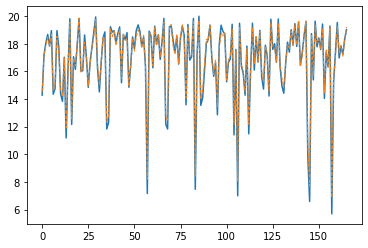

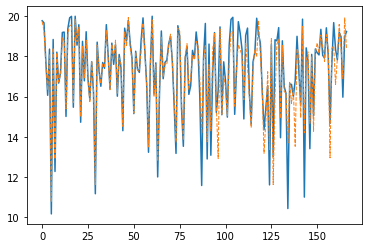

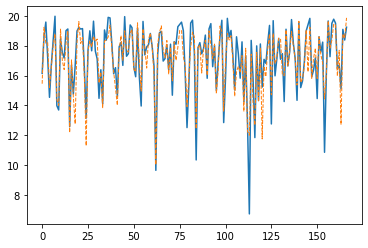

In [28]:
#train
#отрисовать факт синим
#Y_pred = model.predict(X_train,return_hist=True)
for episod in episodes:
    #мы учили систему выдавать последовательности длиной в 500/3, на более длинных система работать не обязана, 
    #так что тестим на последовательностях той же длины
    plt.plot(Y_train[episod[0]:episod[1],:])
    Y_pred = model.predict(X_train[episod[0]:episod[1],:],return_hist=True)
    [pred,p_array,m_pred] = Y_pred
    for i in range(len(pred)):
        #отрисовать прогноз - несколькими цветами, пунктиром, яркость пропорциональна вероятности
        if 10+np.log(p_array[i])>0:
            plt.plot(pred[i],'--',linewidth=0.1*np.max([10+np.log(p_array[i]),0] ) )
    plt.show()

mae 0.8599915264636019 mae_mean 0.050106126943987195


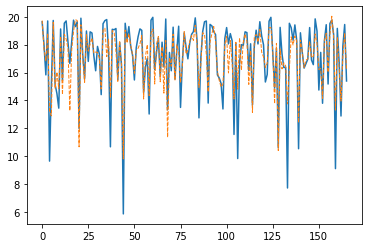

mae 0.7367595765992025 mae_mean 0.04221634933935013


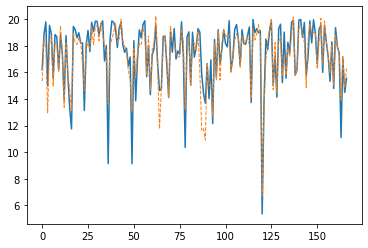

mae 0.858842430808701 mae_mean 0.04990993920836582


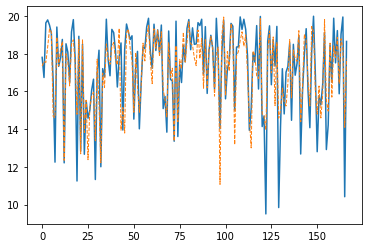

In [29]:
#test
#отрисовать факт
for episod in episodes:
    #мы учили систему выдавать последовательности длиной в 500/3, на более длинных система работать не обязана, 
    #так что тестим на последовательностях той же длины
    plt.plot(Y_test[episod[0]:episod[1],:])
    Y_pred = model.predict(X_test[episod[0]:episod[1],:],return_hist=True)
    [pred,p_array,m_pred] = Y_pred
    for i in range(len(pred)):
        #отрисовать прогноз - несколькими цветами, пунктиром, яркость пропорциональна вероятности
        if 10+np.log(p_array[i])>0:
            plt.plot(pred[i],'--',linewidth=0.1*np.max([10+np.log(p_array[i]),0] ) )
    mae = np.mean(np.abs(m_pred - Y_test[episod[0]:episod[1],:]))
    mae_mean = mae/np.mean(np.abs(Y_test[episod[0]:episod[1],:]))
    print('mae',mae,'mae_mean',mae_mean)
    plt.show()

In [30]:
#делаем датасет
#Суть датасета: есть рандомные массивы, надо найти максимум
X_lst = []
Y_lst = []
for i in range(1000):
    X_rec = np.random.rand(6)*20
    Y_rec = [np.max(X_rec)]
    X_lst.append(X_rec)
    Y_lst.append(Y_rec)
X = np.array(X_lst)
Y = np.array(Y_lst,ndmin=2)

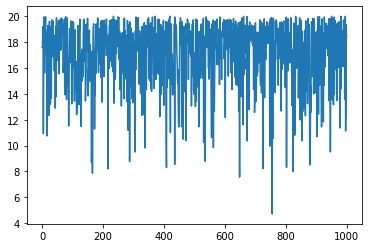

In [31]:
plt.plot(Y)

In [32]:
border = 500
X_train = X[:border,:]
X_test = X[border:,:]
Y_train = Y[:border,:]
Y_test = Y[border:,:]

In [33]:
%%time
model = symbolic_regression_multyboosting(size_genom=900,tact_count=50, regularization=0.06)
episodes=[]
for i in range(len(Y_train)-1):
    episodes.append([i,i+1])
model = symbolic_regression_multyboosting(size_genom=900,tact_count=30, regularization=0.06)
model.fit(X_train,Y_train,forest_count=5,sample_part=1,episodes=episodes,popsize=70, maxiter=4, boosting_count=2, alpha_count=6, elitarism=2, mutation_p=0.02)

FOREST NUMBER 0, episodes [[168 169]
 [ 15  16]
 [493 494]
 [ 72  73]
 [ 22  23]
 [299 300]
 [466 467]
 [ 75  76]
 [360 361]
 [263 264]
 [162 163]
 [433 434]
 [ 95  96]
 [ 75  76]
 [213 214]
 [ 47  48]
 [319 320]
 [287 288]
 [218 219]
 [404 405]
 [124 125]
 [116 117]
 [293 294]
 [167 168]
 [195 196]
 [102 103]
 [260 261]
 [426 427]
 [363 364]
 [ 51  52]
 [359 360]
 [ 38  39]
 [490 491]
 [ 33  34]
 [ 58  59]
 [380 381]
 [255 256]
 [323 324]
 [325 326]
 [ 88  89]
 [196 197]
 [302 303]
 [454 455]
 [351 352]
 [211 212]
 [121 122]
 [ 31  32]
 [450 451]
 [ 80  81]
 [ 52  53]
 [238 239]
 [460 461]
 [ 50  51]
 [132 133]
 [218 219]
 [319 320]
 [207 208]
 [ 49  50]
 [295 296]
 [430 431]
 [136 137]
 [434 435]
 [493 494]
 [271 272]
 [233 234]
 [493 494]
 [392 393]
 [247 248]
 [401 402]
 [406 407]
 [248 249]
 [373 374]
 [ 73  74]
 [185 186]
 [361 362]
 [366 367]
 [252 253]
 [474 475]
 [446 447]
 [ 83  84]
 [ 96  97]
 [ 43  44]
 [288 289]
 [ 26  27]
 [498 499]
 [392 393]
 [ 76  77]
 [254 255]
 [138 

Process ForkPoolWorker-1268:
Process ForkPoolWorker-1267:
  File "/home/sd/anaconda3/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
Traceback (most recent call last):
Process ForkPoolWorker-1264:
  File "/home/sd/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Process ForkPoolWorker-1265:
Traceback (most recent call last):
  File "/home/sd/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/sd/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
  File "/home/sd/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
Process ForkPoolWorker-1263:
  File "/home/sd/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call las

KeyboardInterrupt: 

  File "/home/sd/anaconda3/lib/python3.7/multiprocessing/pool.py", line 44, in mapstar
    return list(map(*args))
  File "/home/sd/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/sd/Python/aixi_booster/aixi_booster.py", line 267, in challenge_supervised
    Y_pred = sym.predict_raw(X,episodes)
  File "/home/sd/anaconda3/lib/python3.7/multiprocessing/pool.py", line 121, in worker
    result = (True, func(*args, **kwds))
  File "/home/sd/anaconda3/lib/python3.7/multiprocessing/pool.py", line 121, in worker
    result = (True, func(*args, **kwds))
  File "/home/sd/Python/aixi_booster/aixi_booster.py", line 1267, in predict_raw
    bot = bfBot(genom.copy(),sizes=[self.X_size,self.Y_size,self.memory_size],pl=self.pl)
  File "/home/sd/anaconda3/lib/python3.7/multiprocessing/pool.py", line 44, in mapstar
    return list(map(*args))
  File "/home/sd/anaconda3/lib/python3.7/multiprocessing/pool.py", line 44, in ma

ValueError: zero-size array to reduction operation minimum which has no identity

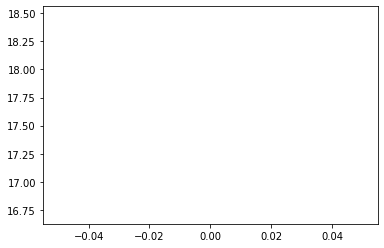

In [34]:
#train
#отрисовать факт синим
for episod in episodes[:20]:
    #мы учили систему выдавать последовательности длиной в 1, на более длинных система работать не обязана, 
    #так что тестим на последовательностях той же длины
    plt.plot(Y_train[episod[0]:episod[1],:])
    Y_pred = model.predict(X_train[episod[0]:episod[1],:],return_hist=True)
    [pred,p_array,m_pred] = Y_pred
    for i in range(len(pred)):
        #отрисовать прогноз - несколькими цветами, пунктиром, яркость пропорциональна вероятности
        if 10+np.log(p_array[i])>0:
            plt.plot(pred[i],'--',linewidth=0.1*np.max([10+np.log(p_array[i]),0] ) )
    plt.show()

In [ ]:
#test
#отрисовать факт
counter = 0
lst = []
for episod in episodes:
    counter += 1
    #мы учили систему выдавать последовательности длиной в 1, на более длинных система работать не обязана, 
    #так что тестим на последовательностях той же длины
    draw = counter<10
    if draw:
        plt.plot(Y_test[episod[0]:episod[1],:])
    Y_pred = model.predict(X_test[episod[0]:episod[1],:],return_hist=True)
    [pred,p_array,m_pred] = Y_pred
    if draw:
        for i in range(len(pred)):
            #отрисовать прогноз - несколькими цветами, пунктиром, яркость пропорциональна вероятности
            if 10+np.log(p_array[i])>0:
                plt.plot(pred[i],'--',linewidth=0.1*np.max([10+np.log(p_array[i]),0] ) )
    mae = np.mean(np.abs(m_pred - Y_test[episod[0]:episod[1],:]))
    mae_mean = mae/np.mean(np.abs(Y_test[episod[0]:episod[1],:]))
    lst.append({'mae':mae, 'mae_mean':mae_mean})
    if draw:
        print('mae',mae,'mae_mean',mae_mean)
        plt.show()

In [ ]:
report = pd.DataFrame(lst)
report

In [ ]:
print(report.mae.mean(),report.mae.mae_mean())